# Extension example 1: Boudary Condition

For some applications, we want to constrain the function space of KANs. This notebook investigates when there are boundary conditions, we can hard code this information into KANs. This can be done by defining a new class MyKAN that inherits the KAN class. The forward() method needs to be overridden.

Example 1: $f(x), x\in [0,1], f(0)=0, f(1)=0$. To construct the condition, we set $f(x)=x(1-x)\cdot {\rm KAN}(x)$.

checkpoint directory created: ./model
saving model version 0.0


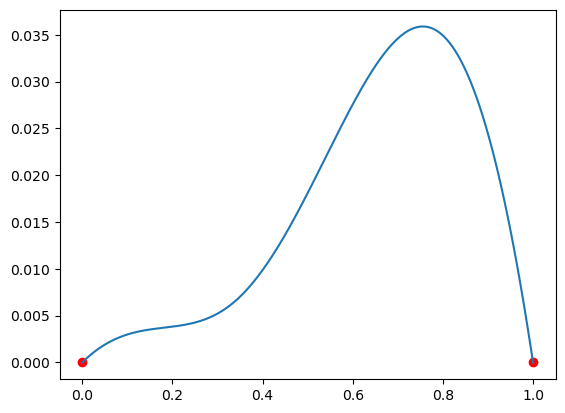

In [1]:
from kan import *

class MyKAN(KAN):
    
    def __init__(self, width=None, grid=3, k=3, seed=1):
        super(MyKAN, self).__init__(width, grid, k, seed=seed)
        
    def forward(self, x):
        y_kan = super(MyKAN, self).forward(x)
        y_mtp = x * (1 - x)
        return y_kan * y_mtp
    
model = MyKAN(width=[1,1], seed=1)
x = torch.linspace(0,1,steps=1001)[:,None]
plt.plot(x.detach().numpy(), model(x).detach().numpy())
plt.scatter([0,1],[0,0], color='red')

Example 2: $f(x), x\in [0,1], f(t_0)=y_0, f(t_1)=y_1$. To construct the condition, we set $f(x)=(x-t_0)(t_1-x)\cdot {\rm KAN}(x) + (y_1-y_0)/(t_1-t_0) * (x-t_0) + y_0$.

checkpoint directory created: ./model
saving model version 0.0


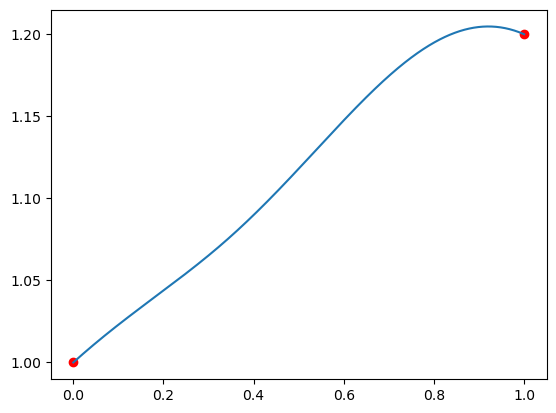

In [2]:
from kan import *

t0 = 0
t1 = 1
y0 = 1
y1 = 1.2

class MyKAN(KAN):
    
    def __init__(self, width, t0, t1, y0, y1, grid=3, k=3, seed=1, noise_scale=1.0):
        super(MyKAN, self).__init__(width, grid, k, seed=seed)
        self.t0 = t0
        self.t1 = t1
        self.y0 = y0
        self.y1 = y1
        
    def forward(self, x):
        y_kan = super(MyKAN, self).forward(x)
        y_mtp = (x- self.t0) * (self.t1 - x)
        return y_kan * y_mtp + (self.y1 - self.y0)/(self.t1 - self.t0) * (x - self.t0) + self.y0
    
model = MyKAN(width=[1,1], t0=t0, t1=t1, y0=y0, y1=y1, seed=1)
x = torch.linspace(0,1,steps=1001)[:,None]
plt.plot(x.detach().numpy(), model(x).detach().numpy())
plt.scatter([t0,t1],[y0,y1], color='red')

Example 3: $f(x,y), x\in[0,1], y\in[0,1], f(0,y)=f(1,y)=f(x,0)=f(x,1)=0$. Set $f(x,y)=x(1-x)y(1-y)\cdot{\rm KAN}(x,y)$.

checkpoint directory created: ./model
saving model version 0.0


/Users/ziming/opt/anaconda3/lib/python3.9/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


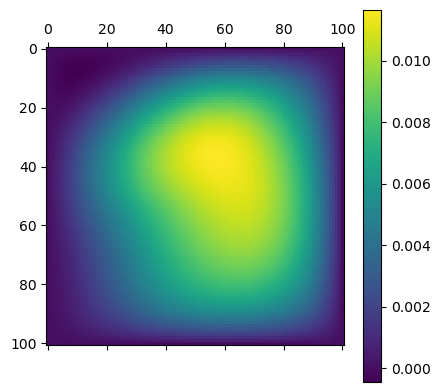

In [3]:
from kan import *

class MyKAN(KAN):
    
    def __init__(self, width=None, grid=3, k=3, seed=1):
        super(MyKAN, self).__init__(width, grid, k, seed=seed)
        
    def forward(self, x):
        y_kan = super(MyKAN, self).forward(x)
        y_mtp = x[:,[0]] * (1 - x[:,[0]]) * x[:,[1]] * (1 - x[:,[1]])
        return y_kan * y_mtp
    
model = MyKAN(width=[2,5,1], seed=2)
x = torch.linspace(0,1,steps=101)
y = torch.linspace(0,1,steps=101)
X, Y = torch.meshgrid(x, y)
inputs = torch.stack([X.reshape(-1,), Y.reshape(-1,)]).permute(1,0)
mat = model(inputs).reshape(101,101)
plt.matshow(mat.detach().numpy())
plt.colorbar()